                     Insertion Sort-COUNTS INSTRUCTIONS-Generating Permutation by Itertools

El codigo esta comentado para mayor facilidad al leer, sin embargo, la explicacion es adicional: Importo librerias utiles para varias cosas mas adelante. se declara la lista cases para guardar la cantidad de pasos que se usaron por permutacion, este arreglo es por motivos de graficacion para hacer las cosas mas faciles.

In [3]:
#coding=utf-8
import random
import matplotlib.pyplot as plt
import time
import math
import itertools

cases=[] #guardo la cantidad de pasos
numPer = 0
min = 100**3 # minimo inicial puesto grande a proposito
max = 0 # max inicial puesto asi a proposito
sum = 0 # cuantos pasos se han calculado en total (todas las permutaciones hasta el momento)

# # CONTEO NUMERO DE INSTRUCCIONES
def isInstr(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])# se copia la lista original
    steps = 0
    for i in range(1,len(v)):#Aqui empieza Insertion sort
        x = v[i]
        j = i-1
        while (j > -1) and (v[j] > x):
            v[j+1] = v[j]
            j = j -1
            steps = steps + 3 #pregunta del while + dos lineas dentro del while
        steps = steps + 1 #pregunta adicional del while que da false y se sale
        v[j+1] = x
        steps = steps + 4 # iteracion for + dos asignaciones (arriba) y asignacion despues de salir del while
    steps = steps + 1 #pregunta adicional del for que da false y termina
    return steps



El metodo principal que genera una lista aleatoria entre los limites especificados y sobre esta se calculan todas las permutaciones posibles con la libreria itertools, y se convierte sus elementos a listas(y al mismo tiempo se mide cuanto tarda) Luego se grafican los datos obtenidos en un histograma y se imprime un registro de las estadisticas que estamos observando

In [6]:

# Esto hace todo 
def bigMethod(n,limitD,limitU):
    global sum
    sum =0
    B = range(limitD,limitU+1)
    random.shuffle(B)# genera lista aleatorio entre los lim especificados de tamaño n
    
    start =time.time()
    iter= list(itertools.permutations(B,n))
    global numPer
    numPer= len(iter)
    for i in range(len(iter)):
        iter[i] = list(iter[i])
        k = isInstr(iter[i])
        global cases 
        cases += [k] #añado el numero de instrucciones en la lista cases
        #guardo el mejor y menor caso de instrucciones
        global min
        global max
        global sum
        if k < min :
             min = k
        if k > max :
             max = k
        #sumo las instrucciones a mi total
        sum += k
    end = time.time()
    
    print 'Total Time: ' + str(end-start)


#PARA GRAFICAR
    plt.hist(cases,align='mid')
    plt.xlabel('Steps')
    plt.ylabel('Number of sets')
    plt.title('Freq. distrib. for steps in a random set of n size')

    print 'Theoretical best time, ' + str(5*n - 4) 
    print 'Theoretical worst time,' + str((3.0/2.0)*n**2 + (7.0/2.0)*n - 4)
    print 'Theoretical average time,' + str((3.0/4.0)*n**2 + (17.0/4.0)*n - 4)
    print 'Experimental best time, ' + str(min)
    print 'Experimental worst time,' + str(max)
    print 'Experimental average time,' + str(sum/numPer)
    print 'Permutations: ' + str(numPer)
    print 'n =' + str(n)
 

<ipython-input-6-30b81414bc79>:21: SyntaxWarning: name 'sum' is assigned to before global declaration
  global sum


Aca puedes digitar la prueba que quieras hacer: los parametros son (n,d,u) n: Tamaño de la lista d: desde donde quieres que esten los numeros de la lista u: hasta donde quieres que esten los numeros de la lista

Total Time: 2.34646105766
Theoretical best time, 41
Theoretical worst time,149.0
Theoretical average time,95.0
Experimental best time, 41
Experimental worst time,140
Experimental average time,90
Permutations: 362880
n =9


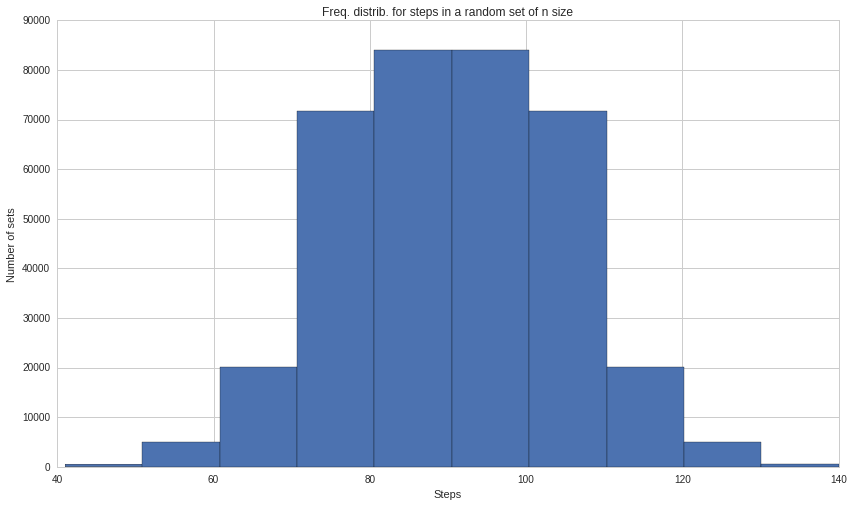

In [5]:
# ESCRIBE ACA LO QUE DESEES
bigMethod(9,0,9)